## Example : Proton stopping power and range in Aluminum oxide

projectile : proton

material   : Al$_2$O$_3$ (solid at room temperature) $\rho = 3.987\,\mathrm{g/cm}^3$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import physical_constants
import physics_library

# font properties
font = {'style':  'normal',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

# proton projectile properties
z_p = 1
m_p = physical_constants.proton_mass

# stopping power
def Stopping_power_Al2O3(z,m,nrj):
    # Al2O3 density
    rho    = 3.987 # density in g/cm3
    # Oxygen atoms concentration in %
    n_O    = 0.541666
    # Oxygen atoms atomic number
    Z_O    = 8
    # Density, symbol and stopping power in Oxygen at ambient conditions
    rho_O  = eval("physical_constants.density_"+physical_constants.symbol[int(Z_O)-1])
    mat_O  = eval("physical_constants.name_"+physical_constants.symbol[int(Z_O)-1])
    S_O    = physics_library.Stopping_power_for_elements_in_compounds(mat_O,z,m,nrj)
    # Aluminum atoms concentration in %
    n_Al   = 0.458333
    # Aluminum atoms atomic number
    Z_Al   = 13
    # Density, symbol and stopping power in Aluminum at ambient conditions
    rho_Al = eval("physical_constants.density_"+physical_constants.symbol[int(Z_Al)-1])
    mat_Al = eval("physical_constants.name_"+physical_constants.symbol[int(Z_Al)-1])
    S_Al   = physics_library.Stopping_power_for_elements_in_compounds(mat_Al,z,m,nrj)
    # Weights :
    w_O  = n_O  * rho / rho_O
    w_Al = n_Al * rho / rho_Al
    # Stopping power (Bragg additivity rule)
    S_Al2O3  = w_O  * S_O
    S_Al2O3 += w_Al * S_Al
    return S_Al2O3

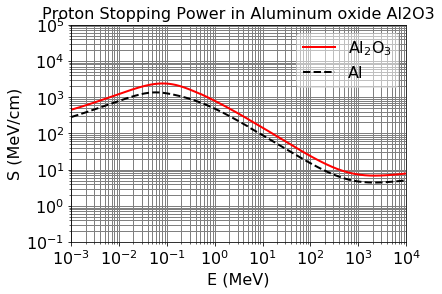

In [6]:
# Aluminum atomic number
Z_Al   = 13

# Aluminum symbol
mat_Al = eval("physical_constants.name_"+physical_constants.symbol[int(Z_Al)-1])

# Stopping power curve
n_gridpoints = np.arange(-3.,5.,0.01)
N_gridpoints = len(n_gridpoints)
Eps          = np.zeros(N_gridpoints)
S_Al         = np.zeros(N_gridpoints)
S            = np.zeros(N_gridpoints)
for i in range(0,N_gridpoints):
    Eps[i]  = 10.**n_gridpoints[i]
    S[i]    = Stopping_power_Al2O3(z_p,m_p,Eps[i])
    S_Al[i] = physics_library.Stopping_power_for_elements_in_compounds(mat_Al,z_p,m_p,Eps[i])

# axis boundaries
ymin      = min(S)
n_ymin    = int(np.log(ymin)/np.log(10.)) - 1
ymax      = max(S)
n_ymax    = 2 + int(np.log(ymax)/np.log(10.))
ymin_plot = float(10.**n_ymin)
ymax_plot = float(10.**n_ymax)
xmin_plot = 1.e-3
xmax_plot = 1.e4

# plot
fig=plt.figure()
plt.loglog(Eps, S   , 'red'  , linestyle='-' , linewidth=2, label=r'$\mathrm{Al}_2\mathrm{O}_3$')
plt.loglog(Eps, S_Al, 'black', linestyle='--', linewidth=2, label='Al')
plt.grid(True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
plt.xlim([xmin_plot,xmax_plot])
plt.xticks(fontsize=16)
plt.xlabel('E (MeV)', fontdict=font)
plt.ylabel('S (MeV/cm)', fontdict=font)
plt.yticks(fontsize=16)
plt.ylim([ymin_plot,ymax_plot])
ttl = 'Proton Stopping Power in Aluminum oxide Al2O3'
plt.title(ttl, fontdict=font)
leg = plt.legend(loc='best', fontsize=16, fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.show()

Stopping range R = 0.039346166930765314 cm and Stopping Time : T = 1.2847480737195928e-11 s


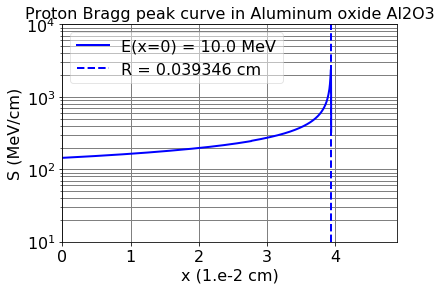

In [3]:
# initial proton energy in MeV
Eps0 = 10.

# compute proton range
dEps         = float(Eps0)*1.e-3
N_gridpoints = 1 + int(float(Eps0)/dEps)
dEps_var     = float(Eps0) / N_gridpoints
Eps          = np.zeros(N_gridpoints)
x            = np.zeros(N_gridpoints)
v            = np.zeros(N_gridpoints)
S0           = np.zeros(N_gridpoints)
R            = 0.
T            = 0.
for i in range(1,N_gridpoints):
    Eps[i] = float(i)*float(dEps_var)
    S0[i]  = Stopping_power_Al2O3(z_p,m_p,Eps[i])
    v[i]   = physics_library.particle_velocity_norm(m_p,Eps[i])
    T      = T + ( float(dEps_var) / ( v[i] * S0[i]) )
    R      = R + ( float(dEps_var) / S0[i] )
print('Stopping range R = '+str(R)+' cm and Stopping Time : T = '+str(T)+ ' s')

# compute Bragg peak curve
N      = 1000 # compromise between accuracy and time computation
dt     = (float(1.01*T) / float(N) )
x1     = np.zeros(N)
v      = np.zeros(N)
Eps    = np.zeros(N)
S1     = np.zeros(N)
x1[0]  = 0.
Eps[0] = float(Eps0)
v[0]   = physics_library.particle_velocity_norm(m_p,Eps[0])
S1[0]  = Stopping_power_Al2O3(z_p,m_p,Eps[0])
for k in range(0,N-1):
    Eps[k+1] = Eps[k] - ( S1[k] * v[k] * dt )
    if (Eps[k+1] < 0.):
        break
    v[k+1]   = physics_library.particle_velocity_norm(m_p,Eps[k+1])
    S1[k+1]  = max(0.,Stopping_power_Al2O3(z_p,m_p,Eps[k+1]))
    x1[k+1]  = x1[k] + (v[k+1] * dt)

# plot Bragg peak curve
xmax      = max(x1) 
n_xmax    = int(np.log(xmax)/np.log(10.)) - 1
x1        = x1 / 10.**n_xmax
xmax_plot = float(int(12.5 * xmax / 10.**n_xmax)/10.)
ymin      = S1[0]
for i in range(0,len(S1)):
    if (S1[i] <= ymin ) and (S1[i] != 0.):
        ymin = S1[i]
n_ymin    = int(np.log(ymin)/np.log(10.)) - 1
ymax      = max(S1)
n_ymax    = 1 + int(np.log(ymax)/np.log(10.))
ymin_plot = float(10.**n_ymin)
ymax_plot = float(10.**n_ymax)
S2        = np.arange(ymin_plot,ymax_plot,(ymax_plot-ymin_plot)/500.)
x2        = float(R / 10.**n_xmax) * np.ones(len(S2))
fig=plt.figure()
plt.semilogy(x1,S1 ,'blue',linestyle='-' ,linewidth=2,label='E(x=0) = '+str(Eps0)+' MeV')
plt.semilogy(x2,S2 ,'blue',linestyle='--',linewidth=2,label='R = '+"{0:.6f}".format(R)+' cm')
plt.grid(True,which="both",axis="both",color='gray', linestyle='-', linewidth=1)
plt.xticks(fontsize=16)
plt.xlabel('x (1.e'+str(n_xmax)+' cm)', fontdict=font)
plt.xlim([0,xmax_plot])
plt.ylabel('S (MeV/cm)', fontdict=font)
plt.yticks(fontsize=16)
plt.ylim([ymin_plot,ymax_plot])
ttl = 'Proton Bragg peak curve in Aluminum oxide Al2O3'
plt.title(ttl, fontdict=font)
leg = plt.legend(loc='upper left', fontsize=16, fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.show()